In [2]:
import pandas as pd
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in dataset (v2, v3, etc)
data = pd.read_csv('final_cleaned_data.csv')
Predictors = pd.read_csv('Predictors.csv').drop(columns=['Description', 'Values', 'Tab in Excel Sheet'])

In [3]:
# Make Predictors just categorical
L = []
j = 0
for i in Predictors['Data Type']:
    if i.split(' ')[0] == 'Categorical':
        L.append(i.split(' ')[0])
    else:
        Predictors = Predictors.drop([j])
    j += 1
Categorical_features = Predictors['Column Name'].drop(columns=['Data Type']).tolist()

In [4]:
# Filter data for just categorical
for i in data:
    if i not in Categorical_features:
        data = data.drop(columns=[i])

Categorical_data = data

In [5]:
#Source: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in Categorical_data.columns :
    data_encoded[i]=label.fit_transform(Categorical_data[i])

In [6]:
# Building of Cramer's V
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [7]:
# Building of the matrix
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
Categorical_Correlation_Matrix = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

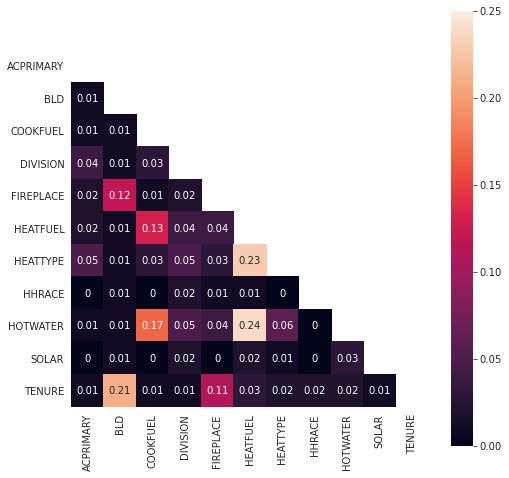

In [13]:
# Creating a correlation heatmap
mask = np.zeros_like(Categorical_Correlation_Matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
with sns.axes_style("white"):
    ax = sns.heatmap(Categorical_Correlation_Matrix, mask=mask,vmin=0., vmax=0.25, annot=True, square=True)

plt.show()